# Numerical analysis: TD 2 - Polynomial interpolation
<h4 align="right"> Author: <i> Hicham Janati </i></h4>
<h4 align="right"> Student: <i> Aurélien Castre </i></h4>

### Divided differences, Lagrange interpolation, Horner's method
Consider a set of points $a \leq x_0 < \dots < x_n \leq b$. The purpose of this problem is to compute the Lagrange polynomial of a function $f$ for the set of points $(x_k)_{0 \leq k \leq n}$ denoted by $L_n f$. 

To do so, we consider the Newton basis formed by the nodal polynomials:
$$ w_k(X) = (X - x_0) \dots (X - x_{k-1}) \qquad \forall k \geq 1$$
and $w_0 = 1$.

1. Show that:
$$ (\forall 1\leq k \leq n)(\exists a_k \in \mathbb{R}) \quad L_k f - L_{k-1}f = a_k w_k $$

and deduce the coefficients of $L_n f$ in the Newton basis.

$\textbf{Answer :}$ Let $1\leq k \leq n$. $x_0, \ldots, x_{k-1}$ are all roots of the polynomial $L_k f - L_{k-1}f$ because $\forall 0\leq i \leq k -1, L_k f (x_i) = L_{k-1}f (x_i) = f(x_i)$. Thus, there is a constant $a_k$ such that $$ L_k f (X) - L_{k-1}f (X) = a_k (X - x_0)\ldots(X - x_{k-1})= a_k w_k(X) $$

Thus, $L_n f = L_0 f + \sum_{k=1}^n L_k f - L_{k-1}f = f(x_0) + \sum_{k=1}^n a_k w_k = \sum_{k=0}^n a_k w_k$ with $a_0 := f(x_0).$

2. We denote the coefficient of $w_k$ by $f_{[x_0, \dots, x_k]}$. What does $f_{[x_k]}$ correspond to ? 

$\textbf{Answer :} f_{[x_k]} = L_{x_k} f = f(x_k)$

3. Let $p_{k-1} = L_{x_0, \dots, x_{k-1}} f$ and  $q_{k-1} = L_{x_1, \dots, x_{k}} f$. 
Show that $r_k = p_k$ where:
$$ r_k(x) = \frac{(x - x_0)q_{k-1}(x) - (x-x_k)p_{k-1}(x)}{x_k - x_0} $$

$\textbf{Answer :}$ $r_k$ is a polynomial of degree at most $k$. Plus, $r_k(x_0) = \frac{-(x_0-x_k)p_k(x_0)}{x_k - x_0} = f(x_0)$, $r_k(x_k) = \frac{(x_k-x_0)q_k(x_k)}{x_k - x_0} = f(x_k)$, and $\forall 1\le i \le k-1, r_k(x_i) = \frac{f(x_i)(x_i - x_0 - x_i + x_k)}{x_k - x_0} = f(x_i).$ The polynomials $r_k$ and $p_k$ are of degree at most $k$ and agree on $k+1$ points so $r_k = p_k$.

4. Deduce the divided differences formula:
$$ f_{[x_0, \dots, x_k]} = \frac{f_{[x_1, \dots, x_k]} - f_{[x_0, \dots, x_{k-1}]}}{x_k - x_0}  $$

$\textbf{Answer :}$ The coefficient of dominant degree in $p_k$ is, by definition, $f_{[x_0, \dots, x_k]}$. On the other hand, the coefficient of dominant degree in $r_k$ is $\frac{f_{[x_1, \dots, x_k]} - f_{[x_0, \dots, x_{k-1}]}}{x_k - x_0}$. By identification of coefficients and by question 3 we finally get the desired formula.

5. Since the choice of the interpolation point $x_0$ is arbitrary, it follows that the formula holds for all $i$:
$$  f_{[x_i, \dots, x_k]} = \frac{f_{[x_{i+1}, \dots, x_k]} - f_{[x_i, \dots, x_{k-1}]}}{x_k - x_i}  $$

Starting from an array $x = (x_0, \dots, x_{n-1})$ and $ y = (f(x_0), \dots, f(x_{n-1}))$, consider the structure:

$$F \stackrel{def}{=} \begin{pmatrix} f_{[x_0]} & & & & & \\ f_{[x_1]} & f_{[x_0, x_1]} & & & &  \\
f_{[x_2]} & f_{[x_1, x_2]} & f_{[x_0, x_1, x_2]} & & & \\
\vdots & \vdots & \vdots & &  \\
f_{[x_n]} & \dots & & & f_{[x_0, \dots, x_n]}
\end{pmatrix}
$$
Write $F_{ij}$ as a function of the sequence $f_{[x_i, \dots, x_j]}$ and $(x_k)_k$ and deduce a relationship between $F_{ij}$, $F_{i, j-1}$, $F_{i-1, j-1}$ and $(x_k)_k$.

$\textbf{Answer :}$ We suppose that the matrix $F$ is indexed starting from $(0, 0)$. Using the last question we have that 
 $$ \forall \, 1 \le i \le n, 1 \le j \le i \, F_{i, j} = \frac{F_{i,j-1} - F_{i-1,j-1}}{x_i - x_{i - j}} $$
 $$\forall \, 1 \le j \le n, 1 \le i \le j, F_{i,j} = 0 $$
 $$\forall \, 0 \le i \le n, F_{i,0} = f_{[x_i]} = f(x_i)$$
6. Implement a function that computes the Newton coefficients. Make your function as vectorized as possible (use only one loop).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def divided_differences_(x, y):
    n = y.shape[0]
    f = np.zeros((n, n))
    f[:,0] = y
    for j in range(1, n):
        f[j:, j] = (f[j:, j-1] - f[j-1:-1, j-1])/(x[j:] - x[:-j])
    return f

7. Horner's method consists in evaluating a polynomial given its coefficients using a smart update:
$$ P(x) = a_0 + x(a_1 + x(a_2 + .... x a_n) $$

Adapt this method for a polynomial written in the Newton basis

$\textbf{Answer :}$ Following the same logic we get :
$$ L_n f (X) = ((\ldots ((a_n(X - x_{n-1}) + a_{n-1})(X - x_{n-2}) + a_{n-2})((X - x_{n-3}) + \ldots )(X - x_1) + a_1)(X - x_0) + a_0$$

8. Write a function that evaluates the Lagrangian polynomial and test it on the following example:

In [3]:
def evaluate(grid_for_eval, newton_coefs, x):
    n = x.shape[0]
    s = newton_coefs[-1,-1]*np.ones(grid_for_eval.shape)
    for i in range(1, n+1):
        s = s*(grid_for_eval - x[n - i]) + newton_coefs[n - i, n-i]
    return s

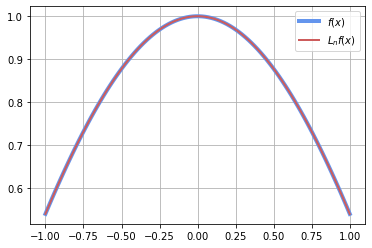

In [4]:
n = 20
x = np.linspace(-1., 1., n)
f = lambda x: np.cos(x)

y = f(x)
grid = np.linspace(-1, 1., 100)
f_grid = f(grid)

newton_coefs = divided_differences_(x, y)
        
interpol = evaluate(grid, newton_coefs, x)

plt.figure()
plt.plot(grid, f_grid, lw=4, color='cornflowerblue', label=r'$f(x)$')
plt.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf(x)$')
plt.grid()
plt.legend()
plt.show()

9. Try the same test with the function: $$ f_a(x) = \frac{1}{1 + 25x^2} $$ 


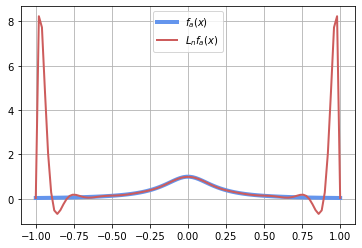

In [5]:
n = 20
x = np.linspace(-1., 1., n)
fa = lambda x : 1/(1 + 25*x**2)

y = fa(x)
grid = np.linspace(-1, 1., 100)
fa_grid = fa(grid)

newton_coefs = divided_differences_(x, y)
        
interpol = evaluate(grid, newton_coefs, x)

plt.figure()
plt.plot(grid, fa_grid, lw=4, color='cornflowerblue', label=r'$f_a(x)$')
plt.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf_a(x)$')
plt.grid()
plt.legend()
plt.show()

10. Play with the the parameters to try to improve the interpolation. How does it behave with larger n ?
This is known as Runge's phenomenon.

$\textbf{Answer :}$ As n grows the approximation worsens and the side effects grow.

11. Change the interpolation points to the Tchebychev sequence:
$$ x_i = \cos(\frac{2i + 1}{2n} \pi) $$
How do you explain the result ?

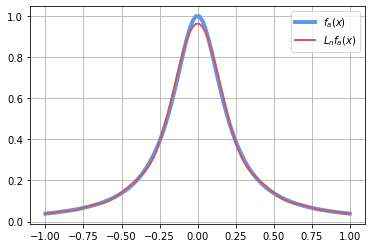

In [6]:
n = 20
ii = np.arange(n)
x = np.cos((2*ii + 1)*np.pi/(2*n))
fa = lambda x : 1/(1 + 25*x**2)

y = fa(x)
grid = np.linspace(-1, 1., 100)
fa_grid = fa(grid)

newton_coefs = divided_differences_(x, y)
        
interpol = evaluate(grid, newton_coefs, x)

plt.figure()
plt.plot(grid, fa_grid, lw=4, color='cornflowerblue', label=r'$f_a(x)$')
plt.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf_a(x)$')
plt.grid()
plt.legend()
plt.show()

$\textbf{Answer :}$ The approximation is cleaner overall (the uniform norm of the difference is smaller) but we loose precision at 0.


12. To explain this, let's evaluate the quality of our approximation. Consider $x = x_{n+1}$. Using the first question, provide a formula for $a_n$ as a function of $e(x) = f(x) - L_{n} f(x)$ and $w_{n+1}(x)$.

$\textbf{Answer :}$ We deduce from question 1 that $L_{n+1}f(X) = L_nf(X) + a_{n+1} w_{n+1}(X)$. For $X = x_{n+1} = x$, this expression becomes $L_{n+1}f(x) = f(x) = L_nf(x) + a_{n+1} w_{n+1}(x)$ i.e. $$a_{n+1} = \frac{e(x)}{w_{n+1}(x)}$$

13. Show that there exists $s$ such that:
    $$e(t) = \frac{f^{(n+1)} (s)}{n+1!} w_{n+1}(x) $$
    
$\textbf{Answer :}$ Let $g = f - L_{n+1}f$, which is derivable $n+1$ times and such that $g(x_0) = g(x_1) = \ldots = g(x_{n+1}) = 0$. Thus, because of Rolle's theorem we know that there is $s$ such that $g^{(n+1)}(s) = 0$. But $L_{n+1}(f)^{(n+1)}(s) = L_{n}(f)^{(n+1)}(s) + a_{n+1} w_{n+1}^{(n+1)}(s) = 0 + a_{n+1} (n+1)n \dots 1 = a_{n+1} (n+1)!$ because $w_{n+1}$ is a monic polynomial of degree $n+1$. Thus, $a_{n+1} = \frac{f^{(n+1)}(s)}{(n+1)!}$ and using question 12 we finally find  $$e(t) = \frac{f^{(n+1)} (s)}{n+1!} w_{n+1}(x) $$.

14. Compute the norm of $w_{n+1}(x)$ for both sequences $(x_k)_k$ for different sizes $n$. What do you observe ? 

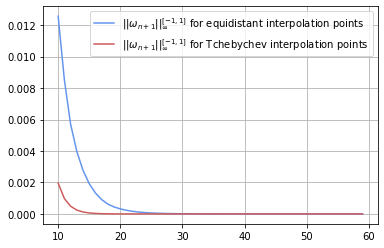

In [7]:
N = np.arange(10, 60)
xx = np.linspace(-1, 1, 100)
norms = []
tnorms = []

for n in N:
    x = np.linspace(-1., 1., n)
    xt = np.cos((2*np.arange(n) + 1)*np.pi/(2*n))
    norm_x =np.max(np.abs([np.prod([(X - a) for a in x]) for X in xx]))
    norm_xt = np.max(np.abs([np.prod([(X - a) for a in xt]) for X in xx]))
    norms.append(norm_x)
    tnorms.append(norm_xt)

plt.figure()
plt.plot(N, norms, color='cornflowerblue', label=r'$||\omega_{n+1}||_{\infty}^{[-1, 1]}$ for equidistant interpolation points')
plt.plot(N, tnorms, color='indianred', label=r'$||\omega_{n+1}||_{\infty}^{[-1, 1]}$ for Tchebychev interpolation points')
plt.grid()
plt.legend()
plt.show()

$\textbf{Answer :}$ The norm of the nodal polynomial decreases exponentially as $n \rightarrow \infty$ but in the case of Tchebychev interpolation points, the norm is considerably smaller.

To get a good approximation, we can't allow ourselves to choose $n$ as big as possible because of the Lebesgue constant $\Lambda_n = \underset{x \in [-1, 1]}{\sup} \sum_{i=0}^{n}|l_i(x)|$ which controls the stability and the error. That is because for equivalent interpolation points, $\Lambda^{\mathrm{equiv}}_n \sim \frac{2^{n+1}}{e \cdot n\ln(n)}$, and for Tchebychev interpolation points, $\Lambda^{\mathrm{Tchebychev}}_n \sim \frac{2}{\pi}\ln(n)$. 

So, to get the error as small as possible, we need the norm of the nodal polynomial (which also controls the error), to be as small as possible for small values of $n$. That is why Tchevbychev interpolation points achieve a better approximation. 

# TD3 - Homework

Consider the problem of approximating $I_{a,b}(f) = \int_a^b f(x) dx$, where $f \in \mathcal{C}^\infty$ via
$$\hat{I}_{a,b}(f) = (b-a)(\lambda_0 f(a) + \lambda_1 f(b) + \lambda_2 f'(a))$$
with $(\lambda_0, \lambda_1, \lambda_2) \in \mathbb{R}^3$.

1. For $a=0$, $b=1$, find $(\lambda_0, \lambda_1, \lambda_2)$ such that the order of the method is exact for polynomials of degree $\le 2$.

$\textbf{Answer :}$ 
In order for the method to be exact for polynomials of degree $\le 2$, we need that $\forall \, 0 \le i \le 2, \, \hat{I}_{0,1}(X^i) = I_{0,1}(X^i)$. This leads to the following equations:
$$\int_0^1 1 \, dx = 1 = \lambda_0 + \lambda_1$$
$$\int_0^1 x \, dx = \frac{1}{2} = \lambda_1 + \lambda_2$$
$$\int_0^1 x^2 \, dx = \frac{1}{3} = \lambda_1$$
Solving that system of equations we find $\lambda_0 = \frac{2}{3}$, $\lambda_1 = \frac{1}{3}$ and $\lambda_2 = \frac{1}{6}$.

2. Deduce an expression of $(\lambda_0, \lambda_1, \lambda_2)$ as function of $a$ and $b$ such that the method is of order 2 for
any interval $[a, b]$.

$\textbf{Answer :}$ 
Substituting $x$ for $a + t(b-a)$ in $I_{a,b}$ we get :
$$
\begin{aligned}
I_{a,b}(f)
&= \int_a^b f(x) \, dx \\
&= (b-a) \int_0^1 f(a + t(b-a)) \, dt \\
&= (b-a) \int_0^1 g(t) \, dt
\end{aligned}
$$
with $g(t) = f(a + t(b-a))$. That way we proved $\hat{I}_{a,b}(f) = (b-a) \hat{I}_{0,1}(g)$. But :
$$
\begin{aligned}
\hat{I}_{0,1}(g)
&= \frac{2}{3} g(0) + \frac{1}{3} g(1) + \frac{1}{6} g'(0) \\
&= \frac{2}{3} f(a) + \frac{1}{3} f(b) + \frac{1}{6} (b-a) f'(a) \\
&= \lambda_0 f(a) + \lambda_1 f(b) + \lambda_2 f'(a)
\end{aligned}
$$

To conclude, we have $\lambda_0 = \frac{2}{3}$, $\lambda_1 = \frac{1}{3}$, and $\lambda_2 = \frac{1}{6} (b-a)$.